<a href="https://colab.research.google.com/github/raghdaemara1/FSND/blob/master/Copy_of_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 28.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
numba 0.56.2 requires setuptools<60, but you have setuptools 65.4.0 which is incompatible.
Looking in indexes: https:

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "raghdaemara"
kaggle_key = "a5c6d04d4fdc37ddfcbd8943c9d8b066"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 66.5MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv' )
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('/content/test.csv' )
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv') 
submission.loc[:, "datetime"] = pd.to_datetime(submission.loc[:, "datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train.drop(columns = ['casual', 'registered'], inplace = True)

In [63]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train,time_limit=600 ,presets = 'best_quality' )

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220928_125829/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220928_125829/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 13
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

### Review AutoGluon's training run with ranking of models that did the best.

In [27]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.260023      11.128845  458.498454                0.000667           0.246163            3       True         18
1   RandomForestMSE_BAG_L2  -53.233494      10.289496  414.170475                0.524169          23.559590            2       True         14
2     ExtraTreesMSE_BAG_L2  -53.894299      10.264471  397.223286                0.499145           6.612401            2       True         16
3          LightGBM_BAG_L2  -55.039711       9.966377  406.903349                0.201050          16.292464            2       True         13
4   NeuralNetFastAI_BAG_L2  -55.272544      10.104864  428.080298                0.339538          37.469414            2       True         17
5          CatBoost_BAG_L2  -55.616702       9.837848  458.108139         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsemb

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    24.672203
1    41.080505
2    44.641891
3    49.415638
4    51.791611
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

In [ ]:
# How many negative values do we have?
(predictions < 0).sum()

In [16]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 351kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-09-28 11:09:29  first raw submission  complete  1.76460      1.76460       
submission.csv  2022-09-28 10:47:48  first raw submission  complete  1.79518      1.79518       
submission.csv  2022-09-26 12:03:35  first raw submission  complete  1.80639      1.80639       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0688d16e10>,
      dtype=object)

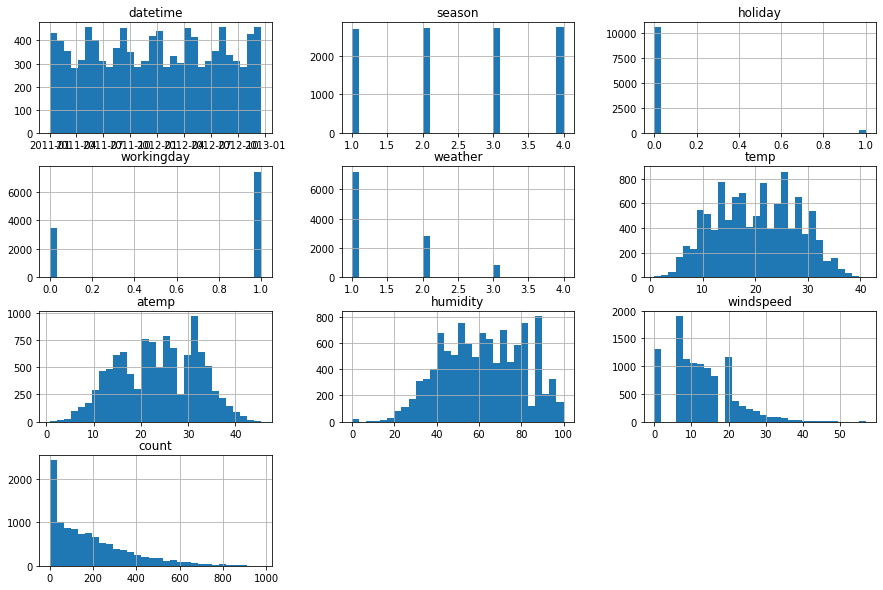

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins=30, figsize=(15,10))

In [22]:
# create a new feature

train['year'] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour

test['year'] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train["season"].astype("category")
train["weather"] = train["season"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["season"].astype("category")

In [24]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0689ddfad0>,
      dtype=object)

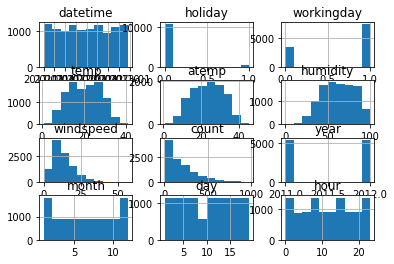

In [25]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [29]:
predictor_new_features = TabularPredictor(label='count', eval_metric = 'root_mean_squared_error').fit(
    train_data=train, 
    time_limit=600,
    presets='best_quality')
    

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220928_111523/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220928_111523/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 13
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [30]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.862823      28.850843  480.370021                0.000572           0.195486            3       True         15
1          CatBoost_BAG_L2  -31.077577      27.378554  431.660187                0.087074          74.441221            2       True         13
2          LightGBM_BAG_L2  -31.423653      27.561062  374.679812                0.269582          17.460846            2       True         11
3        LightGBMXT_BAG_L2  -31.886552      27.976574  380.853205                0.685094          23.634240            2       True         10
4     ExtraTreesMSE_BAG_L2  -32.184069      27.808520  364.638227                0.517040           7.419262            2       True         14
5   RandomForestMSE_BAG_L2  -32.528634      27.840324  382.504271         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -35.521202092633466,
  'LightGBM_BAG_L1': -

In [32]:
predictior_new_features_test= predictor_new_features.predict(test)
predictior_new_features_test.head()

0    16.724396
1    11.312637
2    10.637879
3     9.189493
4     7.787313
Name: count, dtype: float32

In [33]:
# Remember to set all negative values to zero
(predictior_new_features_test< 0).sum()

0

In [34]:
submission_new_features = pd.read_csv('/content/sampleSubmission.csv') 

In [37]:
# Same submitting predictions
submission_new_features["count"]= predictior_new_features_test
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [38]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 297kB/s]
Successfully submitted to Bike Sharing Demand

In [39]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-09-28 11:55:03  new features          complete  0.74960      0.74960       
submission.csv               2022-09-28 11:09:29  first raw submission  complete  1.76460      1.76460       
submission.csv               2022-09-28 10:47:48  first raw submission  complete  1.79518      1.79518       
submission.csv               2022-09-26 12:03:35  first raw submission  complete  1.80639      1.80639       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [50]:
import autogluon.core as ag

time_limit = 120  
num_trials = 4  
search_strategy = 'auto'  


gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 200,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}
hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained


hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train, presets='best_quality', time_limit=time_limit, 
    hyperparameters={'NN': nn_options, 'GBM': gbm_options},
     hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)


Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220928_123249/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 120s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220928_123249/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 13
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:autogluon.core.trainer.abstract_trainer:Fitted model: LightGBM_BAG_L1/T1 ...
INFO:autogluon.core.trainer.abstract_trainer:	-38.2565	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.5s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.01s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: LightGBM_BAG_L1/T2 ...
INFO:autogluon.core.trainer.abstract_trainer:	-36.6587	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.43s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.01s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: LightGBM_BAG_L1/T3 ...
INFO:autogluon.core.trainer.abstract_trainer:	-36.499	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.61s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.02s	 = Validation runtime


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:autogluon.tabular.models.tabular_nn.mxnet.tabular_nn_mxnet:	Ran out of time, stopping training early. (Stopping on epoch 3)
INFO:autogluon.core.scheduler.seq_scheduler:	Stopping HPO to satisfy time limit...
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: NeuralNetMXNet_BAG_L1/T1 ...
INFO:autogluon.core.trainer.abstract_trainer:	-159.133	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	3.77s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.29s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 72.81s of the 112.76s of remaining time.
INFO:autogluon.core.models.ensemble.bagged_ensemble_model:	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
INFO:autogluon.core.trainer.abstract_trainer:	-38.8953	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	12.04

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:autogluon.core.scheduler.seq_scheduler:	Stopping HPO to satisfy time limit...
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: LightGBM_BAG_L2/T1 ...
INFO:autogluon.core.trainer.abstract_trainer:	-42.0196	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.53s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.01s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: LightGBM_BAG_L2/T2 ...
INFO:autogluon.core.trainer.abstract_trainer:	-41.7539	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.48s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.01s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: LightGBM_BAG_L2/T3 ...
INFO:autogluon.core.trainer.abstract_trainer:	-42.247	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.67s	 = Training 

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:autogluon.tabular.models.tabular_nn.mxnet.tabular_nn_mxnet:	Ran out of time, stopping training early. (Stopping on epoch 0)
INFO:autogluon.core.scheduler.seq_scheduler:	Stopping HPO to satisfy time limit...
INFO:autogluon.core.trainer.abstract_trainer:Fitted model: NeuralNetMXNet_BAG_L2/T1 ...
INFO:autogluon.core.trainer.abstract_trainer:	-151.1068	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	1.35s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.28s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 39.34s of the 39.32s of remaining time.
INFO:autogluon.core.models.ensemble.bagged_ensemble_model:	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
INFO:autogluon.core.trainer.abstract_trainer:	-37.8465	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	12.14

In [51]:
prediction_new_features_hpo = predictor_new_hpo.predict(test)
prediction_new_features_hpo.head()

0    10.997766
1     6.656096
2     6.550434
3     6.568469
4     6.561373
Name: count, dtype: float32

In [52]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -37.630974       1.141548  87.187773                0.000584           0.147617            3       True         11
1        WeightedEnsemble_L2  -37.715746       0.614879  37.931188                0.000753           0.167564            2       True          6
2         LightGBM_BAG_L2/T3  -37.768860       0.940444  63.280100                0.180143          13.225535            2       True          9
3         LightGBM_BAG_L2/T1  -37.846497       0.871712  62.197007                0.111412          12.142442            2       True          7
4         LightGBM_BAG_L2/T2  -38.102551       0.849410  61.672179                0.089109          11.617615            2       True          8
5         LightGBM_BAG_L1/T3  -38.104300       0.280368  13.130752  

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'NeuralNetMXNet_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'NeuralNetMXNet_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -38.89525286758646,
  'LightGBM_BAG_L1/T2': -38.75476542060625,
  'LightGBM_BAG_L1/T3': -38.10429961427952,
  'LightGBM_BAG_L1/T4': -89.25213628259918,
  'NeuralNetMXNet_BAG_L1/T1': -159.1330300379166,
  'WeightedEnsemble_L2': -37.71574579132042,
  'LightGBM_BAG_L2/T1': -37.84649747727037,
  'LightGBM_BAG_L2/T2': -38.1025

In [53]:
# Remember to set all negative values to zero
prediction_new_features_hpo[prediction_new_features_hpo<0] = 0

In [54]:
# Same submitting predictions
submission_new_hpo =  pd.read_csv('/content/sampleSubmission.csv')
submission_new_hpo.loc[:, "datetime"] = pd.to_datetime(submission_new_hpo.loc[:, "datetime"])
submission_new_hpo.head() 


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [55]:
submission_new_hpo["count"] = prediction_new_features_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 301kB/s]
Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-09-28 12:34:59  new features with hyperparameters  complete  0.49550      0.49550       
submission_new_hpo.csv       2022-09-28 12:31:32  new features with hyperparameters  complete  0.50409      0.50409       
submission_new_features.csv  2022-09-28 11:55:03  new features                       complete  0.74960      0.74960       
submission.csv               2022-09-28 11:09:29  first raw submission               complete  1.76460      1.76460       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

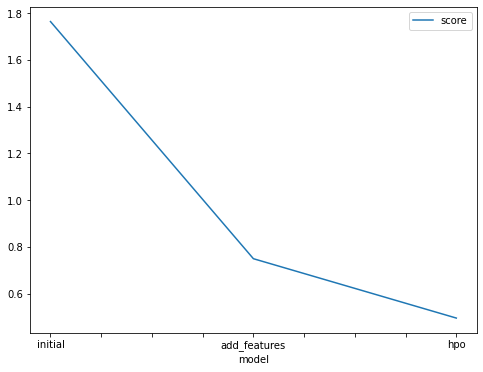

In [58]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.76460, 0.74960, 0.49550]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

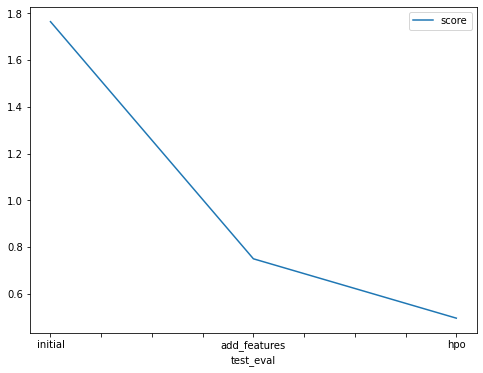

In [59]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.76460, 0.74960, 0.49550]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [61]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "GBM", "NN"],
    "score": [1.76460, 0.74960, 0.49550]
})

,model,hpo1,score
0,initial,default,1.7646
1,add_features,GBM,0.7496
2,hpo,NN,0.4955
